# REPLICATION NOTEBOOK

# Project Milestone P4
## Testing Propositions Derived from Twitter Studies

---
This milestone aims to replicate figure 2 from the paper "Testing Propositions Derived from Twitter Studies". My approach to replicating the figure comes in 4 main steps:
1. Load the data.
2. Filter out irrelevant data and merge dataframes.
3. Manipulate data to plot.
4. Visualise the data.

## Step 1: Load
1. The data is extracted and converted into txt files and placed in the same folder as this notebook.
2. Since each file is in the same format, we can use the pandas **read_csv** function to read the data and set the seperator as '\t'. For EgoTimelines, we need the encoding = 'ISO-8859-1' to convert a bytes object to a string object using a particular character set encoding.

In [1]:
import pandas as pd

#Read EgoAlterProfiles.txt
EgoAlterProfiles = pd.read_csv("EgoAlterProfiles.txt",sep="\t")

#Read EgoTimelines.txt
EgoTimelines = pd.read_csv("EgoTimelines.txt", encoding = 'ISO-8859-1', sep="\t") 

Let's get a glimpse of the data.

In [2]:
EgoAlterProfiles.head()

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at,protected
0,1,True,30.0,28,9.0,NaN,en,Wed Oct 26 03:30:32 +0000 2011,False
1,2,True,2.0,8,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False
2,3,True,1.0,0,0.0,NaN,fr,Mon Apr 23 20:57:26 +0000 2012,False
3,4,True,3.0,3,68.0,NaN,en,Sun Feb 14 07:50:39 +0000 2010,False
4,5,True,65.0,118,748.0,NaN,fr,Mon Jun 11 14:17:06 +0000 2012,False


In [3]:
EgoTimelines.head()

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID
0,NaN,NaN,398477318,249552537051598848,Sat Sep 22 16:55:35 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
1,NaN,NaN,398477318,249537963145433088,Sat Sep 22 15:57:41 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
2,NaN,NaN,398477318,129377372209299456,Thu Oct 27 02:02:23 +0000 2011,NaN,NaN,NaN,0,1,NaN,NaN,NaN
3,NaN,NaN,398477318,302401054690140160,Fri Feb 15 12:56:44 +0000 2013,NaN,NaN,797583722,0,1,NaN,NaN,1970142
4,NaN,NaN,398477318,249538739611787264,Sat Sep 22 16:00:46 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN


## Step 2: Filter & Merge

This step aims to make the data more concise as there is a lot of information that is not required to replicate figure 2.
1. The supplementary information file lets us know that the following can be filtered out: non-egos, nan values, users without tweets
2. As the tweet creation time and the utc offset information are on 2 separate dataframes, we can merge the dataframes for ease of getting data from 1 consolidated dataframe instead.
3. As merging 2 dataframes show the discrepancies between them, we will remove more irrelevant information that do not correspond to the 4222 users studied.
4. Retain only the relevant columns required for plotting

In [19]:
#Remove uncessary rows such as non-egos, nan values, users without tweets
Egos = EgoAlterProfiles[EgoAlterProfiles['IsEgo']==True]
Egos_without_nan = Egos.dropna()
Egos_with_tweets = Egos_without_nan[Egos_without_nan['statuses_count']!=0]

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
#To obtain utc offsets of users, we need to merge the 2 dataframes

#Before merging, we first need to rename the ID column name to egoID
Egos_with_tweets['egoID']=Egos_with_tweets['ID']

#Merge dataframes
dfmerged = Egos_with_tweets.merge(EgoTimelines, on = 'egoID', how = 'outer').fillna(0)

In [24]:
dfmerged

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at_x,protected,egoID,...,id,tweetid,created_at_y,hashtags,urls,mentions_ids,retweet_count,retweetedUserID,replytoUserID,metionID
0,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,6.070529e+07,2.661832e+17,Wed Nov 07 14:19:48 +0000 2012,0,http://t.co/f4iUVq3i,0,0.0,0.0,0.0,0
1,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,6.070529e+07,1.715688e+17,Mon Feb 20 12:16:02 +0000 2012,0,0,0,0.0,0.0,0.0,0
2,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,6.070529e+07,2.657009e+17,Tue Nov 06 06:23:18 +0000 2012,0,http://t.co/HPBDRag6,0,0.0,0.0,0.0,0
3,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,6.070529e+07,2.877150e+09,Mon Jul 27 20:48:55 +0000 2009,0,0,0,0.0,0.0,0.0,0
4,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,6.070529e+07,1.715678e+17,Mon Feb 20 12:12:14 +0000 2012,0,http://t.co/2ElP3Ghw,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703232,0.0,0,0.0,0.0,0.0,0.0,0,0,0,34003,...,2.450374e+09,4.575128e+17,Sat Apr 19 13:35:17 +0000 2014,0,0,1908174541,116.0,1665499.0,0.0,1665499
4703233,0.0,0,0.0,0.0,0.0,0.0,0,0,0,34003,...,2.450374e+09,4.575008e+17,Sat Apr 19 12:47:51 +0000 2014,0,0,1908174541,130.0,1665499.0,0.0,1665499
4703234,0.0,0,0.0,0.0,0.0,0.0,0,0,0,34003,...,2.450374e+09,4.575817e+17,Sat Apr 19 18:09:08 +0000 2014,0,0,27415537,465.0,2212205.0,0.0,2212205
4703235,0.0,0,0.0,0.0,0.0,0.0,0,0,0,34003,...,2.450374e+09,4.571743e+17,Fri Apr 18 15:10:15 +0000 2014,0,0,"1086139884,1086139884",0.0,0.0,992318.0,"992318,992318"


In [29]:
#Remove users that are not part of the 4222 users used to plot figure 2
dfmerged_egos = dfmerged[dfmerged['IsEgo']!=0]

#Remove rows without any post timing information
dfmerged_filtered = dfmerged_egos[dfmerged_egos['created_at_y']!=0]

#Reset index
dfmerged_reset_ind=dfmerged_filtered.reset_index(drop=True)

#Remove columns that are not useful to plot the graph
dfmerged_concise=dfmerged_reset_ind.drop(columns=['IsEgo', 'followers_count','friends_count','statuses_count','lang','protected','tweetid','hashtags','urls','mentions_ids','retweet_count','retweetedUserID','replytoUserID','metionID','replyto_userid','retweeted_userid','id'])

In [30]:
dfmerged_concise

,ID,utc_offset,created_at_x,egoID,created_at_y
0,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Wed Nov 07 14:19:48 +0000 2012
1,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Feb 20 12:16:02 +0000 2012
2,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Tue Nov 06 06:23:18 +0000 2012
3,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Jul 27 20:48:55 +0000 2009
4,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Feb 20 12:12:14 +0000 2012
...,...,...,...,...,...
2995491,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:38:01 +0000 2013
2995492,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:05 +0000 2013
2995493,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:18 +0000 2013
2995494,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:34 +0000 2013


## Step 3: Manipulate

Now that we have a more consolidated and concise data, we need to manipulate the data before we visualise it.

First, the creation time needs to be adjusted according to the utc offset so that all the tweets and users are at the same utc.

Next, user IDs, day of the week and hours of tweets posted are retained. A for loop to count the tweets and users in each hour of each day of the week is then used to arrange the data in arrays for ease of plotting.

In [31]:
#Create a function to adjust weekday and hour according to utc offset

def slicing(input_date, input_utc):
    try:
        offset = input_utc/3600
        hour = int(input_date[11:13])+offset
        wkday = str(input_date[:3])
        wkday_list = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
        
        for i in range(len(wkday_list)):
            if wkday == wkday_list[i]:
                wkday = i   #set weekday as a number of the week
                break
            
        if hour>=24:        #if offset leads to hour>24, day is set to next day
            wkday = wkday+1
            hour = hour-24
            if wkday>6:     #if weekday was Sat, next day will be Sun
                wkday=0
            
        elif hour<0:        #if offset leads to hour<24, day is set to previous day
            wkday = wkday-1
            hour = hour+24
            if wkday<0:     #if weekday was Sun, previous day will be Sat
                wkday=6
                
        my_date = int(wkday), int(hour)
   
    except ValueError:
        my_date = None
    
    return my_date

In [32]:
#Store ID, weekday and hour in an array for 2nd figure
#Place day and hour in a 2D array for 1st figure

import numpy as np

array=[]
array_fig = np.zeros((7,24))

for i in range(len(dfmerged_concise)):
    Day, Hour = slicing(dfmerged_concise['created_at_y'].loc[i],dfmerged_concise['utc_offset'].loc[i])
    ID = dfmerged_concise['egoID'].loc[i]
    array.append([ID, Day, Hour])
    
    array_fig[Day][Hour] = array_fig[Day][Hour] + 1   #counter for each tweet on the same weekday and hour

In [35]:
#Remove duplicate users in the same hour and day
array_unique = list(set(map(tuple, array)))

#Place day and hour in a 2D array for 2nd figure
array_unique_fig = np.zeros((7,24))

for i in range(len(array_unique)):
    Day = array_unique[i][1]
    Hour = array_unique[i][2]
    array_unique_fig[Day][Hour] = array_unique_fig[Day][Hour] + 1    #counter for each user on the same weekday and hour

## Step 4: Visualise the data

Finally, let's visualise the data! To replicate Figure 2, we need to create 2 subplots - number of tweets and users against hour.

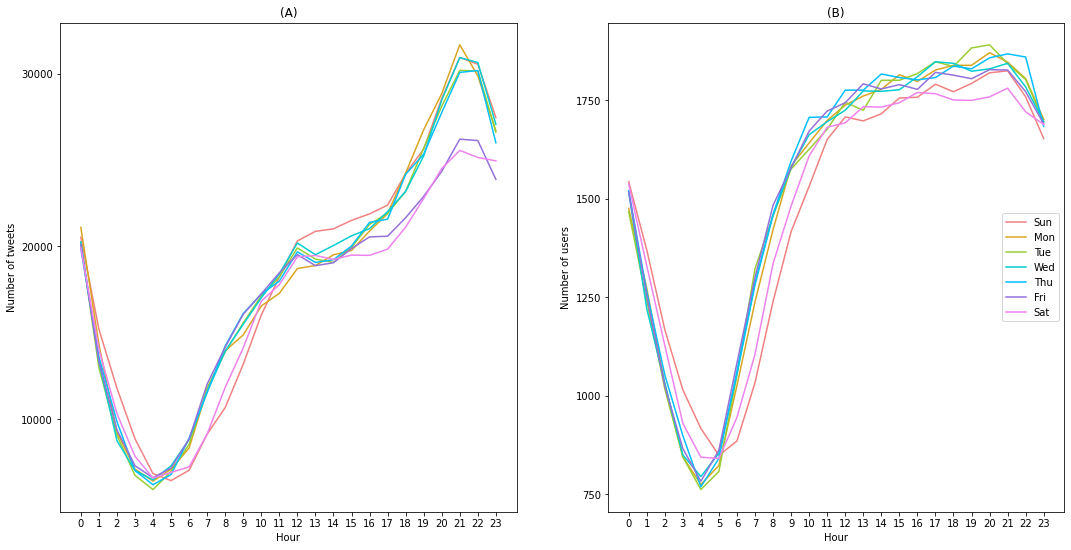

In [51]:
#Plot data
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,9))

#Label the axes
ax1.set_ylabel('Number of tweets')
ax2.set_ylabel('Number of users')
ax1.set_xlabel('Hour')
ax2.set_xlabel('Hour')

ax1.set_title('(A)')
ax2.set_title('(B)')

#Adjust x axis ticks
x_ticks = np.arange(0, 24, 1)
ax1.set_xticks(x_ticks)
ax2.set_xticks(x_ticks)

#Adjust y axis ticks
ax1.set_yticks(np.arange(0, 30001, 10000))
ax2.set_yticks(np.arange(750, 1751, 250))

#Set range of colors and labels
colors = ['lightcoral', 'goldenrod', 'yellowgreen', 'darkturquoise', 'deepskyblue', 'mediumpurple','violet']
labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat']

#Subplots
for k in range(len(array_fig)):
    ax1.plot(x,array_fig[k], color=colors[k])

for k in range(len(array_unique_fig)):
    ax2.plot(x,array_unique_fig[k],color=colors[k],label=labels[k])

#Add legend for 2nd figure
ax2.legend(loc='center right')

# Project Milestone P2
## Testing Propositions Derived from Twitter Studies

---
This milestone aims to replicate the figure 1A from the paper "Testing Propositions Derived from Twitter Studies". My approach to replicating the figure comes in 4 main steps:
1. Load the data (already done above)
2. Check against the supplementary information.
3. Calculate CCDF and remove irrelevant data.
4. Visualise the data.

## Step 2: Check against supplementary information

The supplementary information document gives us an idea of how the figure was created. It mentioned that it used the number of statuses in ego profiles. This indicates that we only need to use the column "statuses_count" in the file "EgoAlterProfiles".

Looking at the file "EgoAlterProfiles", there is another column called "IsEgo". As the figure only looks at ego profiles, we first need to remove non-egos in the data.


In [42]:
#Retain only egos
egos = EgoAlterProfiles.loc[EgoAlterProfiles['IsEgo'] == True]

In [43]:
#As the figure focuses on tweets, rename statuses as tweets.
tweets = egos['statuses_count']
tweets

0          9.0
1          7.0
2          0.0
3         68.0
4        748.0
         ...  
34001      0.0
34002    370.0
34003      0.0
34004      0.0
34005      0.0
Name: statuses_count, Length: 34006, dtype: float64

The supplementary information document also gave us the number of users for each selection of N (number of tweets). Before visualising our data, let's confirm that our data aligns with the supplementary information:

- N ≥ 0: 34,006.
- N ≥ 1: 18,830.
- N ≥ 2: 14,943.
- N ≥ 3: 13,079.
- N ≥ 4: 11,916.
- N ≥ 5: 11,111.

In [44]:
import numpy as np

#As the tweets are not sorted, we need to first sort them.
tweets_sorted = np.sort(tweets)

#Print the number of users for each selection of N
TWEETS = []
N = 6
for i in range(N):
    tweets_sorted_i = tweets_sorted[tweets_sorted>=i]
    TWEETS.append(tweets_sorted_i)
    print("Number of users (N ≥ %d): {}".format(len(TWEETS[i])) %i)

Number of users (N ≥ 0): 34006
Number of users (N ≥ 1): 18830
Number of users (N ≥ 2): 14943
Number of users (N ≥ 3): 13079
Number of users (N ≥ 4): 11916
Number of users (N ≥ 5): 11111


## Step 3: Calculate CCDF and remove irrelevant data
Now that the data aligns with that of the supplementary information, we can calculate complementary cumulative distribution function (CCDF) and remove irrelevant data.

Figure 1A in the paper plots CCDF against the number of tweets. As we already have the number of tweets sorted into each selection of N, we need to do the following:
1. Calculate CCDFs
2. Drop duplicate CCDFs for each tweet

In [46]:
#Calculate CCDFs
CCDF = []
for i in range(N):
    cdf_i = np.array(range(len(TWEETS[i])))/float(len(TWEETS[i])) #calculate CDF
    ccdf_i = 1-cdf_i #calculate CCDF
    CCDF.append(ccdf_i[:len(TWEETS[i])])

In [47]:
#To check the data, use pandas DataFrame
for i in range(N):    
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    print(df_i)

          Tweets      CCDF
0            0.0  1.000000
1            0.0  0.999971
2            0.0  0.999941
3            0.0  0.999912
4            0.0  0.999882
...          ...       ...
34001   117375.0  0.000147
34002   143685.0  0.000118
34003   147067.0  0.000088
34004   183715.0  0.000059
34005  1082327.0  0.000029

[34006 rows x 2 columns]
          Tweets      CCDF
0            1.0  1.000000
1            1.0  0.999947
2            1.0  0.999894
3            1.0  0.999841
4            1.0  0.999788
...          ...       ...
18825   117375.0  0.000266
18826   143685.0  0.000212
18827   147067.0  0.000159
18828   183715.0  0.000106
18829  1082327.0  0.000053

[18830 rows x 2 columns]
          Tweets      CCDF
0            2.0  1.000000
1            2.0  0.999933
2            2.0  0.999866
3            2.0  0.999799
4            2.0  0.999732
...          ...       ...
14938   117375.0  0.000335
14939   143685.0  0.000268
14940   147067.0  0.000201
14941   183715.0  0.000134
149

In [48]:
#As there are duplicate CCDFs for the same number of tweets, we need to drop them
for i in range(N):    
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    print(df_unique_i)

          Tweets      CCDF
0            0.0  1.000000
15176        1.0  0.553726
19063        2.0  0.439422
20927        3.0  0.384609
22090        4.0  0.350409
...          ...       ...
34001   117375.0  0.000147
34002   143685.0  0.000118
34003   147067.0  0.000088
34004   183715.0  0.000059
34005  1082327.0  0.000029

[2414 rows x 2 columns]
          Tweets      CCDF
0            1.0  1.000000
3887         2.0  0.793574
5751         3.0  0.694583
6914         4.0  0.632820
7719         5.0  0.590069
...          ...       ...
18825   117375.0  0.000266
18826   143685.0  0.000212
18827   147067.0  0.000159
18828   183715.0  0.000106
18829  1082327.0  0.000053

[2413 rows x 2 columns]
          Tweets      CCDF
0            2.0  1.000000
1864         3.0  0.875259
3027         4.0  0.797430
3832         5.0  0.743559
4460         6.0  0.701532
...          ...       ...
14938   117375.0  0.000335
14939   143685.0  0.000268
14940   147067.0  0.000201
14941   183715.0  0.000134
14942

## Step 4: Visualise the data
To replicate Figure 1A, we need to plot CCDF against number of tweets, with both axes on logarithmic scales.

It is important to note that in Figure 1A in the paper, the first plotted data point for N ≥ 0, its CCDF is 1 and for N ≥ 1, its CCDF is 2. Therefore, in order to replicate the figure exactly, we need to shift the tweets by an increment of 1 for each selection of N.

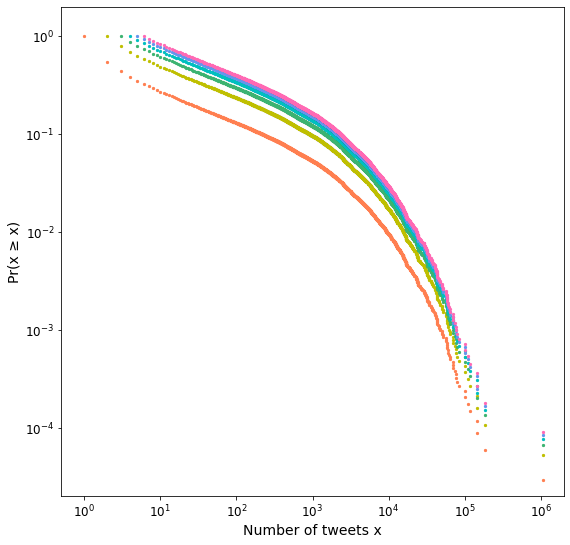

In [49]:
#Plot CCDF against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlim(0.5, 2e6)
plt.ylim(2e-5, 2e0)
plt.xscale('log') #set x-axis on log scale
plt.yscale('log') #set y-axis on log scale 
plt.xlabel('Number of tweets x', fontsize=14)
plt.ylabel('Pr(x ≥ x)', fontsize=14)
plt.minorticks_off()
plt.tick_params(axis='both', labelsize=12)

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink'] #set range of colours

for i in range(N):
    d_i = {'Tweets':TWEETS[i],'CCDF':CCDF[i]}
    df_i = pd.DataFrame(d_i, columns = ['Tweets','CCDF'])
    df_unique_i = df_i.drop_duplicates(subset=['Tweets'])
    
    plt.scatter(df_unique_i.Tweets+1, df_unique_i.CCDF, color=colors[i], s=5, marker='o') #shift tweets by increment of 1
